##Automatic Thresholding

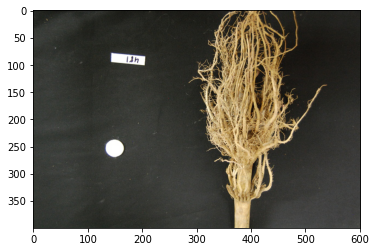

In [1]:
# Importing modules
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters

# Reading the image
image = skimage.io.imread("maize-root-cluster.jpg")

fig, ax = plt.subplots()
plt.imshow(image)
plt.show()

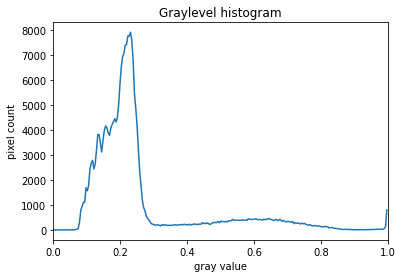

In [2]:
# Converting the image to grayscale
gray_image = skimage.color.rgb2gray(image)

# Blurring the image to de-noise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

# Histogram of the blurred image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)
plt.show()

In [3]:
# Performing Automatic Thresholding 
t = skimage.filters.threshold_otsu(blurred_image) 
print("Found automatic threshold t = ", t)

Found automatic threshold t =  0.4113342270063075


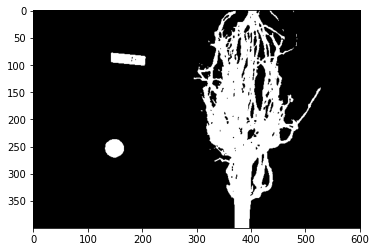

In [4]:
# Creating a binary mask with the threshold found by Otsu's method
binary_mask = blurred_image > t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap='gray')
plt.show()

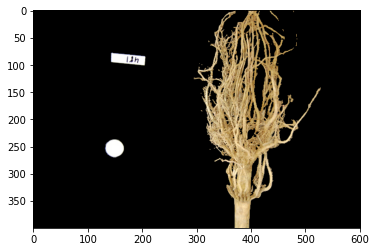

In [5]:
# Applying the binary mask to select the foreground
selection = np.zeros_like(image)
selection[binary_mask] = image[binary_mask]

fig, ax = plt.subplots()
plt.imshow(selection)
plt.show()